In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import ipywidgets as widgets

# Problem 1: Human capital accumulation

# Question 1 

In this question we will solve the model in period two where we take the level of human capital as given. In order to do this, we start by defining the relevant functions followed by plotting the solution.

In [2]:
# Defining parameters
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = .1
h_vec = np.linspace(0.1,1.5,100)

In [4]:
## This section defines a bunch of functions in order to solve the model in period 2.

# Defining the utility function
def utility(c,rho):
    """ 
    The utility function 

    Args: 
        c (type: float): The consumption
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.

    Returns: 
        The utility (float) given consumption and coeffcient of relative risk aversion.      
    """
    
    return c**(1-rho)/(1-rho)


# Defining the net utility given level of human capital, labor supply and parameters
def v2(h2,l2,rho,gamma,w,b):
    """ 
    The net utility taking account for disutility of working 

    Args: 
        h2 (type: float, list): Level of human capital
        l2 (type: int, boolean): Dummy of working (l2=1) or not working (l2=0)
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        The net utility (float,list) given level of human capital, labor supply and parameters.      
        The type depends on the type of h2
    """
    
    if l2 == 0: # Calculate the utility if not working
        return utility(b,rho)
    if l2 == 1: # Calculate the utility if working 
        return utility(w*h2,rho)-gamma*l2



# Defining function of the cutoff level of human capital so a person will choose to work in the second period
def h_cutoff(rho,gamma,w,b):
    """ 
    The cutoff level of human capital so a person will choose to work in the second period

    Args: 
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        A value of human capital (float)     
    """
    
    # Defining function that is the squared difference between net utility of working and not working
    obj = lambda h: (v2(h,1,rho,gamma,w,b)-v2(h,0,rho,gamma,w,b))**2
    x0 = 0 # Initial guess
    
    # Find the cutoff value by minimizing the squared difference
    res_temp = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[0,10])

    return res_temp.x
    

# Define a function to 
def opt2(u2_nowork,u2_work):
    """ 
    Solves the model in the second period based on the utility of working and not working

    Args: 
        u2_nowork (type: list, tuple ndarray): A vector of utility if not working
        u2_work (type: list, tuple ndarray): A vector of utility if working

    Returns: 
        u2_opt: A vector (ndarray) of the optimal utility for different levels of human capital 
        l2_opt: A vector (list) of the optimal labor supply for different levels of human capital 
    """  
    
    # Create a new vector that is the maximum of the two utility vectors above 
    u2_opt = np.maximum(u2_work,u2_nowork)

    l2_opt = [] # Empty list for later purpose
    
    # Appending the optimal labor supply to the 'l2_opt'-list. Takes the value 1 
    # if utility of working is greater than the utility of not working
    for i in range(len(h_vec)):
        if u2_work[i]>=u2_nowork[i]:
            l2_opt.append(1)
        else:
            l2_opt.append(0)
   
    return u2_opt, l2_opt


# Defining function that solves the model in the second period, taking the level of human capital 
# as given (not as a function of human capital and labor supply in the first period)
def sol2(h_vec,rho,gamma,beta,w,b):
    """ 
    Solves the model in the second period taking the level of human capital 
    as given (not as a function of human capital and labor supply in the first period)

    Args: 
        h_vec (type: list, tuple, ndarray): Vector of different levels of human capital
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        u2_nowork: A vector (ndarray) of the utility if not working for different levels of human capital 
        u2_work: A vector (ndarray) of the utility if  working for different levels of human capital 
        u2_opt: A vector (ndarray) of the optimal utility for different levels of human capital 
        l2_opt: A vector (list) of the optimal labor supply for different levels of human capital 
    """  
    
    # Generates two vectors: the net utility if working or not working for different levels of human capital
    u2_nowork = np.zeros(len(h_vec)) + v2(h_vec,0,rho,gamma,w,b)
    u2_work = v2(h_vec,1,rho,gamma,w,b)

    u2_opt, l2_opt = opt2(u2_nowork, u2_work)
    
    return u2_nowork, u2_work, u2_opt, l2_opt

The worker will choose to work if h > 0.556
 


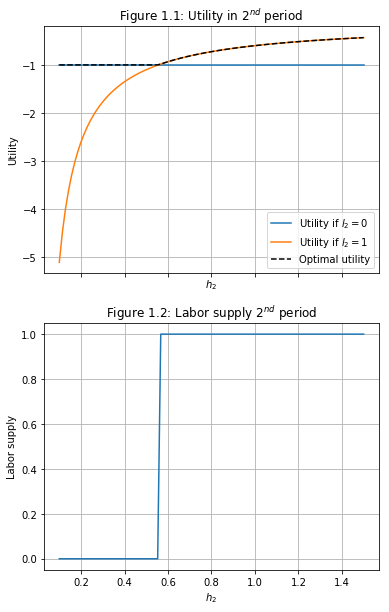

In [40]:
# This part solves the model in the second period and plots the utility and labor supply

# Call the optimal utility and labor supply as well as the utility of working and not 
u2_nowork, u2_work, u2_opt, l2_opt = sol2(h_vec,rho,gamma,beta,w,b)


# Plotting the utility levels and optimal level of labor supply
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,10))

# Sub_fig 1
ax1.plot(h_vec,u2_nowork,label='Utility if $l_2=0$')
ax1.plot(h_vec,u2_work, label='Utility if $l_2=1$')
ax1.plot(h_vec,u2_opt, linestyle='dashed', color='black', label='Optimal utility')
ax1.grid()
ax1.legend(loc='lower right')
ax1.set_xlabel('$h_2$')
ax1.set_ylabel('Utility')
ax1.set_title('Figure 1.1: Utility in $2^{nd}$ period');

# Sub_fig two
ax2.plot(h_vec,l2_opt)
ax2.grid()
ax2.set_xlabel('$h_2$')
ax2.set_ylabel('Labor supply')
ax2.set_title('Figure 1.2: Labor supply $2^{nd}$ period');

print(f'The worker will choose to work if h > {h_cutoff(rho,gamma,w,b):.3}\n ')

Figure 1.1 and 1.2 show the utility in the second period and the optimal labor supply, respectively,for given values of $h_2$. If the worker does not work his utility will be the same regardless of the value of $h_2$ as his consumption is equal to the benefits. In contrast, the utility is increasing in human capital if the worker works as the consumption increases in $h_2$. Due to the disutility and low potential consumption, it is optimal for the worker not to work if the level of human capital is low. It will be optimal to be unemployed as long as the level of human capital is below 0.556. With higher levels of human capital it will be better to work af the higher consumption possibility more than compensate for the disutility of working.

## Question 2

In this question we will solve the model in the first period. We start by defining the relevant functions followed by plotting the solution.

In [41]:
# This part defines different functions to solve the model in the first period 

# Creating the expected level of human capital in period 2
def h2_exp(h1,l1,Delta):
    """ 
    The expected value of human capital in the second period 

    Args: 
        h1 (type: float, list): Level of human capital in the first period
        l1 (type: int, boolean): Labor supply in first period. Has to be a dummy or boolean
        Delta (type: float): Potential chok to human capital in period two

    Returns: 
        A value or vector of human capital (float/list). The type depends on the type of h1     
    """    
    
    return h1 + l1 + 0.5*Delta # 0.5*Delta is the expected value of the chock to human capital


# Defing function to calculate expected utility of period two
def v2_exp(h2_exp,rho,gamma,w,b):
    """ 
    The expected utility of period two

    Args: 
        h2_exp (type: list): List of expected levels of human capital
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        v2: The expected utility (list) given level of human capital, labor supply in the first period and parameters.      
    """
    
    # Defining variable containing the cutoff value of human capital 
    # so a person will choose to work in the second period
    h2_cutoff = h_cutoff(rho,gamma,w,b)
    v2 = [] # Empty list for later purpose
    
    # Appending the expected utility in the second periods.
    # The utility depends on the expected level of human capital is above or below the cutoff value
    for i in range(len(h2_exp)):
        if h2_exp[i]>=h2_cutoff:
            v2.append(utility(w*h2_exp[i],rho)-gamma)
        if h2_exp[i]<h2_cutoff:
            v2.append(utility(b,rho))

    return v2

# Defining a function to calculate the net utility in period one 
# taking account for the expected utility in the second period
def v1(h1,l1,rho,gamma,beta,w,b,Delta):
    """ 
    The net utility in the first period taking account 
    for the expected utility in the second period

    Args: 
        h1 (type: float, list): Level of human capital
        l1 (type: int, boolean): Dummy of working (l2=1) or not working (l2=0)
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        beta (type: float): The discounting factor of the utilty in the second period. Have to be between 0 and 1.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        The net utility (ndarray) given level of human capital, labor supply and parameters.      
    """   
    
    if l1 == 0:
        return utility(b,rho) + beta*np.array(v2_exp(h2_exp(h1,l1,Delta),rho,gamma,w,b))
    if l1 == 1:
        return utility(w*h1,rho) - gamma + beta*np.array(v2_exp(h2_exp(h1,l1,Delta),rho,gamma,w,b))



# Defining function to solve the model in period 1
def sol1(h1_vec,rho,gamma,beta,w,b,Delta):
    """ 
    Solves the model in the first period for different level of human capital. 
    
    Args: 
        h1_vec (type: list, tuple, ndarray): Vector of different levels of human capital
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        beta (type: float): The discounting factor of the utilty in the second period. Has to be between 0 and 1.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.
        Delta (type: float): Potential chok to human capital in period two

    Returns: 
        u1_nowork: A vector (ndarray) of the utility if not working for different levels of human capital 
        u1_work: A vector (ndarray) of the utility if  working for different levels of human capital 
        u1_opt: A vector (ndarray) of the optimal utility for different levels of human capital 
        l1_opt: A vector (ndarray) of the optimal labor supply for different levels of human capital 
    """  

    # Creating vectors of utility in the first period if not working and working
    u1_nowork = v1(h1_vec,0,rho,gamma,beta,w,b,Delta)
    u1_work = v1(h1_vec,1,rho,gamma,beta,w,b,Delta)

    # Create a new vector that is the maximum of the utility vectors above 
    u1_opt = np.maximum(u1_work,u1_nowork)

    l1_opt = [] # Empty list for later purpose
    
    # Appending the optimal labor supply to the 'l1_opt'-list. Takes the value 1 
    # if utility of working is greater than the utility of not working
    for i in range(len(h_vec)):
        if u1_work[i]>=u1_nowork[i]:
            l1_opt.append(1)
        else:
            l1_opt.append(0)

    return u1_nowork, u1_work, u1_opt, l1_opt


# Defining function that calculate the expected utility and labor supply 
# in the second period based on the labor supply and level of human capital in the first
def sol1_2(h1_vec,rho,gamma,beta,w,b,Delta):
    """ 
    Find the expected labor supply and utility in the second period 
    based on the labor supply and level of human capital in the first
    
    Args: 
        h1_vec (type: list, tuple, ndarray): Vector of different levels of human capital
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        beta (type: float): The discounting factor of the utilty in the second period. Has to be between 0 and 1.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.
        Delta (type: float): Potential chok to human capital in period two

    Returns: 
        u2_opt_nowork1: A vector (ndarray) of the utility in second period if not working in first period for different levels of human capital
        l2_opt_nowork1: A vector (list) of labor supply n second period if not working in first period for different levels of human capital
        u2_opt_work1: A vector (ndarray) of the utility in second period if working in first period for different levels of human capital
        l2_opt_work1: A vector (list) of labor supply n second period if working in first period for different levels of human capital
    """    
    
    # Expected level of utility in period 2 if not working in neither periods
    u2_nowork_nowork = np.zeros(len(h_vec)) + v2(h2_exp(h1_vec,0,Delta),0,rho,gamma,w,b)
    
    # Expected level of utility in period 2 if not working first period and working in second period
    u2_nowork_work = v2(h2_exp(h1_vec,0,Delta),1,rho,gamma,w,b)

    # Find the optimal level of utility and labor supply based on the two vectors of utility just calculated
    u2_opt_nowork1, l2_opt_nowork1 = opt2(u2_nowork_nowork,u2_nowork_work)


    # Expected level of utility in period 2 if working first period and not working in second period
    u2_work_nowork = np.zeros(len(h_vec)) + v2(h2_exp(h1_vec,1,Delta),0,rho,gamma,w,b)

    # Expected level of utility in period 2 if working in both periods
    u2_work_work = v2(h2_exp(h1_vec,1,Delta),1,rho,gamma,w,b)

    # Find the optimal level of utility and labor supply based on the two vectors of utility just calculated
    u2_opt_work1, l2_opt_work1 = opt2(u2_work_nowork,u2_work_work)

    return u2_opt_nowork1, l2_opt_nowork1, u2_opt_work1, l2_opt_work1


In [88]:
# This part solves the model in the first perid and plot the utility and labor supply
def fig1_2(Delta):
    # Call the optimal utility and labor supply in the first period as well as the utility of working and not 
    u1_nowork, u1_work, u1_opt, l1_opt = sol1(h_vec,rho,gamma,beta,w,b,Delta)

    # Call the optimal utility and labor supply in the second period 
    # depending on the working and not working in the first period 
    u2_opt_nowork1, l2_opt_nowork1, u2_opt_work1, l2_opt_work1 = sol1_2(h_vec,rho,gamma,beta,w,b,Delta)


    # Plot the various curves
    fig1_2, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(14,10))


    # Sub_fig 1
    ax1.plot(h_vec,u1_nowork, label='Utility if $l_1=0$')
    ax1.plot(h_vec,u1_work, label='Utility if $l_1=1$')
    ax1.plot(h_vec,u1_opt, linestyle='dashed', color='black', label='Optimal utility')
    ax1.grid()
    ax1.legend(loc='lower right')
    ax1.set_xlabel('$h_1$')
    ax1.set_ylabel('Utility')
    ax1.set_title('Figure 1.3: Expected total utility');

    # Sub_fig2
    ax2.plot(h_vec,l1_opt)
    ax2.grid()
    ax2.set_xlabel('$h_1$')
    ax2.set_ylabel('Labor supply')
    ax2.set_title('Figure 1.4: Labor supply $1^{st}$ period');

    # Sub_fig3
    ax3.plot(h_vec,u2_opt_nowork1, label='Utility if $l_1=0$')
    ax3.plot(h_vec,u2_opt_work1, label='Utility if $l_1=1$')
    ax3.plot(h_vec, u2_nowork, color='black', linestyle='dashed', label='Utility if $l_2=0$')
    ax3.grid()
    ax3.legend(loc=[0.6,.25])
    ax3.set_xlabel('$h_1$')
    ax3.set_ylabel('Utility')
    ax3.set_title('Figure 1.5: Expected optimal utility in $2^{nd}$ period');

    # Sub_fig4
    ax4.plot(h_vec,l2_opt_nowork1, label='Labor supply if $l_1=0$')
    ax4.plot(h_vec,l2_opt_work1, label='Labor supply if $l_1=1$')
    ax4.grid()
    ax4.legend(loc='lower right')
    ax4.set_xlabel('$h_1$')
    ax4.set_ylabel('Labor supply')
    ax4.set_title('Figure 1.6: Expected labor supply in $2^{nd} period$');
    
# Making the figure interactive so Delta is adjustable
widgets.interact(fig1_2,
        Delta = widgets.RadioButtons(
                    value=0.1,    
                    description='$\\Delta$', 
                    options=[0.1,0.6]
                    )
); 



interactive(children=(RadioButtons(description='$\\Delta$', options=(0.1, 0.6), value=0.1), Output()), _dom_cl…

Figure 1.3 shows the expected total utility in the two cases where the worker works or does not work in tehe first period. As in question 1, it is not optimal to work in the first period if the level of human capital is sufficiently low. However in contrast to the question 1, the utility if not working increases in $h_1$ if $h_1$ is high enough. The reason is that the it is optimal to work in the second period because the expected level of human capital is higher than the cutoff value. Nevertheless, it will never be optimal for the worker not to work in the first period and work in the second period. This can be concluded based on figure 1.4 and 1.6. It is optimal to work in the first period if $h_1$ is greater than 0.35. As shown in figure 1.6 the worker will work if $h_1$ is greater than 0.035 and the worker has been working in the first period. The reason is that the level of human capital be will be high enough in the second period due to the capital accumulation. If $h_1$ is below the cutoff value the worker wont work in neither of the periods. <br> <br>
If the chok to human capital is bigger, the conclusion will be different as it can be optimal not to work in the first period and work in the second period. This will be optimal because the expected level of human capital in the second period is sufficiently high, i.e. higher than the cutoff value (you can see by changing the value of Delta to 0.6)

## Question 3

In this section we will show if it is optimal to work even if the wage is lower than the benefits. We adress this by comparing the wage rate (w) with the benefits (b). We could have chosen not to compare $h_1 \cdot w$ with the benefits, but our conslusion is robust to this change.

In [92]:
# This section makes the same figures as in question 1.2, but where the values of the parameters can be adjusted 


# Defining a function to plot the optimal labor supply and utility in both periods
def fig1_3(w,b,gamma):
    """ Generates a four figures. The first plotting the utility if working and not working in the first period. 
        The second plotting the optimal labor supply in the first period. The third plotting the optimal 
        utility in period two if working and not working in period two. The fourth plooting the optimal labor
        supply in period 2 if working and not working in period 1.

    Args: 
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        beta (type: float): The discounting factor of the utilty in the second period. Has to be between 0 and 1.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        Four interactive plots

    Notice: 
        The function is generated so that it can be called using widgets.interact()
        Thus, it is not intended to be used on its own. 
        """
    
    # Calling the vectors of utility and labor supply in the two periods
    u1_nowork, u1_work, u1_opt, l1_opt = sol1(h_vec,rho,gamma,beta,w,b,Delta)
    u2_opt_nowork1, l2_opt_nowork1, u2_opt_work1, l2_opt_work1 = sol1_2(h_vec,rho,gamma,beta,w,b,Delta)

    # Creating the figures
    fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2,  ncols=2, sharex=True, figsize=(14,10))
    
    # Sub_fig 1
    ax1.plot(h_vec,u1_nowork, label='Utility if $l_1=0$')
    ax1.plot(h_vec,u1_work, label='Utility if $l_1=1$')
    ax1.plot(h_vec,u1_opt, linestyle='dashed', color='black', label='Optimal utility')
    ax1.grid()
    ax1.legend(loc='lower right')
    ax1.set_xlabel('$h_1$')
    ax1.set_ylabel('Utility')
    ax1.set_title('Figure 1.7: Expected total utility');

    # Sub_fig2
    ax2.plot(h_vec,l1_opt)
    ax2.grid()
    ax2.set_xlabel('$h_1$')
    ax2.set_ylabel('Labor supply')
    ax2.set_ylim([-0.1,1.1])
    ax2.set_title('Figure 1.8: Labor supply $1^{st}$ period');
    
    # Sub_fig3
    ax3.plot(h_vec,u2_opt_nowork1, label='Utility if $l_1=0$')
    ax3.plot(h_vec,u2_opt_work1, label='Utility if $l_1=1$')
    ax3.plot(h_vec, np.zeros(len(h_vec))+utility(b,rho),color='black', linestyle='dashed', label='Utility if $l_2=0$')
    ax3.grid()
    ax3.legend(loc='lower right')
    ax3.set_xlabel('$h_1$')
    ax3.set_ylabel('Utility')
    ax3.set_ylim([utility(b,rho)-0.5,0])
    ax3.set_title('Figure 1.9: Expected optimal utility in $2^{nd}$ period');

    # Sub_fig4
    ax4.plot(h_vec,l2_opt_nowork1, label='Labor supply if $l_1=0$')
    ax4.plot(h_vec,l2_opt_work1, label='Labor supply if $l_1=1$')
    ax4.grid()
    ax4.legend(loc='lower right')
    ax4.set_xlabel('$h_1$')
    ax4.set_ylabel('Labor supply')
    ax4.set_ylim([-0.1,1.1])
    ax4.set_title('Figure 1.10: Expected labor supply in $2^{nd} period$');

# Making the figure interactive so w, b, and gamma are adjustable
widgets.interact(fig1_3,
    b = widgets.FloatSlider(
                    value=1.1,
                    description='Benefits', 
                    min=0.1,
                    max=3, 
                    step=0.1,
                    ),
    w = widgets.FloatSlider(
                    value=1,
                    description='Wage', 
                    min=0.1,
                    max=3, 
                    step=0.1,
                    ),
    gamma = widgets.FloatSlider(
                    value=0.1,
                    description='$\gamma$', 
                    min=0,
                    max=1, 
                    step=0.1,
                    )
); 

interactive(children=(FloatSlider(value=1.0, description='Wage', max=3.0, min=0.1), FloatSlider(value=1.1, des…

The short answer is yes it is possible that the worker works even thoug the wage as lower than the benefits. There are two reasons. The first reason is that potential consumption in the given period may be higher by working if the level of human caiptal is high enough. The other reason is that by working in the first period, the worker accumulate more capital and thus higher consumption in the second period. This conslusion is robust if we say that $h_1 \cdot w$ has to be less than the benefits (b) as can be seen by setting $\gamma = 0.1$, $b=1.1$ and $w=1$. The cutoff value of $h_1$ is about 0.9, but this gives $c_1=0.9<b=1.1$. Nevertheless it is optimal because the worker accumulates more human capital by working and thus gains more utility in the second period. <br>
However the conslusion is only valid for a some values of b, w, and $\gamma$. By increasing the difference between the wage and benefits or by increasing the $\gamma$ there are a lot of combinations where the worker wont work in neither of the periods. This is either becuase the difference between the wage and benefits are too big or the disutility of working is too high. 